<a href="https://colab.research.google.com/github/sanjayi2000/MachineLearning/blob/main/2348552DLLab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from kerastuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from kerastuner.tuners import RandomSearch

In [ ]:
data=pd.read_csv('/content/credit_card_fraud.csv')

In [ ]:
data

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,2022-09-24 13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,04/29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,2020-07-24 11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,03/26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,2023-03-18 01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,11/29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,2021-01-07 21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,09/25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,2021-12-16 06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,03/31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2020-12-17 20:36:48,2214.15,Lakshay Khatri,8a0015c8601fe597e160c31a05fd5e4a87a4b876df426f...,Manda Ltd,1236,Anantapuram,EUR,Visa,04/26,d4b9aead1dd10a596542d1d8211a5021b9c3e894751d01...,5,0d219c55-87cf-43af-a1bb-cda408710de1,0,1,Online,214.34.176.247,Mobile,madhavshah,Et maiores quaerat fugiat voluptatibus reprehe...
7996,2022-07-04 05:19:11,675.97,Dharmajan Salvi,de3530e65ccf6fc0c0eb7f7a7e8e5b71bb907d5207d390...,Bhavsar Group,3406,Guntakal,INR,Visa,11/25,d874e4e4a5df21173b0f83e313151f813bea4f488686ef...,0,054f6d58-9925-4c49-9f5d-01b6bf3db5c8,1,3 or more,In-Person,34.237.199.33,Tablet,NaN,Assumenda maxime provident rem quis consequunt...
7997,2022-08-14 19:14:45,918.28,Alia Sane,227356d19fd5374e9cfdd134387fe3499683a1c7929981...,"Gole, Yohannan and Singhal",7504,Udupi,USD,MasterCard,05/24,20e9c64c05a54d199610fb7e38135361324b5ed5dcf39c...,5,4178f63e-459b-40e6-8db6-a6ff2d6348e5,1,3 or more,In-Person,220.203.140.160,Tablet,suhanavala,Voluptatibus odit praesentium iste libero ipsa...
7998,2021-05-16 18:21:52,3035.31,Chirag Rege,669bd9fcc7e40cc25d99c773678e48bcb3fdadf7fee6a9...,Kakar LLC,4015,Sultan Pur Majra,EUR,American Express,09/24,e7866fdc6672f827c76f6124ca3eeaff44aff8b7caf4ee...,0,2424f724-8bd2-4dd0-8b39-e824999a9764,1,1,In-Person,216.56.133.227,Tablet,sumeriyengar,Animi excepturi nam distinctio fuga. Vel eius ...


In [ ]:
data.isnull().sum()

Transaction Date and Time                     0
Transaction Amount                            0
Cardholder Name                               0
Card Number (Hashed or Encrypted)             0
Merchant Name                                 0
Merchant Category Code (MCC)                  0
Transaction Location (City or ZIP Code)       0
Transaction Currency                          0
Card Type                                     0
Card Expiration Date                          0
CVV Code (Hashed or Encrypted)                0
Transaction Response Code                     0
Transaction ID                                0
Fraud Flag or Label                           0
Previous Transactions                         0
Transaction Source                            0
IP Address                                    0
Device Information                            0
User Account Information                   4010
Transaction Notes                             0
dtype: int64

In [ ]:
drop = ['Cardholder Name', 'User Account Information', 'Card Number (Hashed or Encrypted)', 'Card Expiration Date', 'CVV Code (Hashed or Encrypted)', 'Transaction ID', 'Device Information','Transaction Notes']
n_data = data.drop(columns=drop)


In [ ]:
n_data

,Transaction Date and Time,Transaction Amount,Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Transaction Response Code,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address
0,2022-09-24 13:54:27,285.88,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,5,1,None,Online,18.106.240.6
1,2020-07-24 11:20:13,1777.32,Sule PLC,7277,Vasai-Virar,EUR,American Express,12,1,None,Online,212.48.185.128
2,2023-03-18 01:05:36,3939.01,Badal PLC,9297,Nangloi Jat,USD,Visa,5,1,3 or more,In-Person,17.190.112.46
3,2021-01-07 21:53:04,376.44,Konda-Sodhi,5686,Ramagundam,USD,Visa,5,0,2,In-Person,153.136.24.104
4,2021-12-16 06:22:24,1687.33,Dua Ltd,2940,Adoni,INR,MasterCard,5,1,2,Online,196.153.28.131
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2020-12-17 20:36:48,2214.15,Manda Ltd,1236,Anantapuram,EUR,Visa,5,0,1,Online,214.34.176.247
7996,2022-07-04 05:19:11,675.97,Bhavsar Group,3406,Guntakal,INR,Visa,0,1,3 or more,In-Person,34.237.199.33
7997,2022-08-14 19:14:45,918.28,"Gole, Yohannan and Singhal",7504,Udupi,USD,MasterCard,5,1,3 or more,In-Person,220.203.140.160
7998,2021-05-16 18:21:52,3035.31,Kakar LLC,4015,Sultan Pur Majra,EUR,American Express,0,1,1,In-Person,216.56.133.227


In [ ]:
n_data.isnull().sum()

Transaction Date and Time                  0
Transaction Amount                         0
Merchant Name                              0
Merchant Category Code (MCC)               0
Transaction Location (City or ZIP Code)    0
Transaction Currency                       0
Card Type                                  0
Transaction Response Code                  0
Fraud Flag or Label                        0
Previous Transactions                      0
Transaction Source                         0
IP Address                                 0
dtype: int64

In [ ]:
X = n_data.drop(columns=['Fraud Flag or Label'])
y = n_data['Fraud Flag or Label']

In [ ]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

In [ ]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from kerastuner import HyperModel

class MyHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units_layer_1', min_value=32, max_value=512, step=32),
                        activation='relu', input_shape=self.input_shape))
        model.add(Dense(units=hp.Int('units_layer_2', min_value=32, max_value=512, step=32),
                        activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        return model

In [ ]:
tuner = RandomSearch(
    MyHyperModel(input_shape=(X_train.shape[1],)),
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='helloworld')

tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 10 Complete [00h 00m 50s]
val_accuracy: 0.5054687261581421

Best val_accuracy So Far: 0.5234375
Total elapsed time: 00h 29m 32s


Epoch 1/50
160/160 [==============================] - 25s 141ms/step - loss: 0.6941 - accuracy: 0.4941 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/50
160/160 [==============================] - 16s 98ms/step - loss: 0.4265 - accuracy: 0.8477 - val_loss: 0.9506 - val_accuracy: 0.5086
Epoch 3/50
160/160 [==============================] - 13s 83ms/step - loss: 0.0091 - accuracy: 0.9994 - val_loss: 0.9741 - val_accuracy: 0.4891
Epoch 4/50
160/160 [==============================] - 14s 88ms/step - loss: 5.3002e-04 - accuracy: 1.0000 - val_loss: 0.9820 - val_accuracy: 0.5047
Epoch 5/50
160/160 [==============================] - 13s 80ms/step - loss: 2.5920e-04 - accuracy: 1.0000 - val_loss: 0.9956 - val_accuracy: 0.5070
Epoch 6/50
160/160 [==============================] - 14s 90ms/step - loss: 1.6798e-04 - accuracy: 1.0000 - val_loss: 1.0070 - val_accuracy: 0.5039
Epoch 7/50
160/160 [==============================] - 15s 94ms/step - loss: 1.1795e-04 - accuracy: 1.0000 - val_loss: 1.017

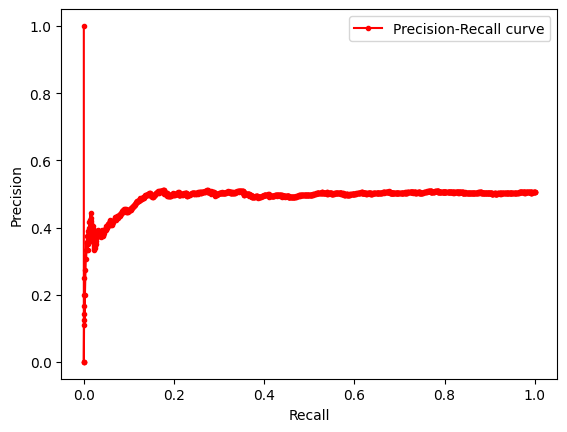

In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)
y_pred = model.predict(X_test).ravel()
y_pred_class = (y_pred > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)

precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall_vals, precision_vals, marker='.', label='Precision-Recall curve',color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()